In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df= pd.read_csv('BostonHousingData.csv')
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,NaN,36.2


In [3]:
df.corr()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
CRIM,1.000000,-0.191178,0.401863,-0.054355,0.417130,-0.219150,0.354342,-0.374166,0.624765,0.580595,0.281110,-0.381411,0.444943,-0.391363
ZN,-0.191178,1.000000,-0.531871,-0.037229,-0.513704,0.320800,-0.563801,0.656739,-0.310919,-0.312371,-0.414046,0.171303,-0.414193,0.373136
INDUS,0.401863,-0.531871,1.000000,0.059859,0.764866,-0.390234,0.638431,-0.711709,0.604533,0.731055,0.390954,-0.360532,0.590690,-0.481772
CHAS,-0.054355,-0.037229,0.059859,1.000000,0.075097,0.104885,0.078831,-0.093971,0.001468,-0.032304,-0.111304,0.051264,-0.047424,0.181391
NOX,0.417130,-0.513704,0.764866,0.075097,1.000000,-0.302188,0.731548,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.582641,-0.427321
RM,-0.219150,0.320800,-0.390234,0.104885,-0.302188,1.000000,-0.247337,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.614339,0.695360
AGE,0.354342,-0.563801,0.638431,0.078831,0.731548,-0.247337,1.000000,-0.744844,0.458349,0.509114,0.269226,-0.275303,0.602891,-0.394656
DIS,-0.374166,0.656739,-0.711709,-0.093971,-0.769230,0.205246,-0.744844,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.493328,0.249929
RAD,0.624765,-0.310919,0.604533,0.001468,0.611441,-0.209847,0.458349,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.479541,-0.381626
TAX,0.580595,-0.312371,0.731055,-0.032304,0.668023,-0.292048,0.509114,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.536110,-0.468536


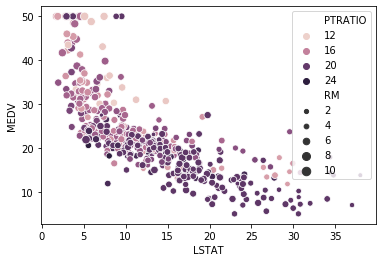

In [4]:
sns.scatterplot(x='LSTAT', y='MEDV', size= 'RM', hue='PTRATIO', data= df)

In [5]:
X = df.iloc[:, :-1].values
y = df.iloc[:, -1].values

In [6]:
from sklearn.impute import SimpleImputer
impute = SimpleImputer(missing_values= np.nan, strategy= 'mean')
impute.fit(X[:, :])
X[:, :]=impute.transform(X[:, :])

In [7]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.2, random_state=0)

In [8]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
model= LinearRegression()
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 72.15%
STD: 10.80
Mean squared error: 34.98738954423886


In [9]:
from sklearn.linear_model import Ridge
model= Ridge(alpha=0.05,solver='cholesky')
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 72.16%
STD: 10.83
Mean squared error: 35.04380836787881


In [10]:
from sklearn.linear_model import Lasso
model= Lasso(alpha=0.01)
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 72.12%
STD: 10.91
Mean squared error: 35.38972928080381


In [11]:
from sklearn.linear_model import ElasticNet
model= ElasticNet(alpha=0.01,l1_ratio=0.5)
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 71.88%
STD: 11.04
Mean squared error: 36.35016653988792


In [12]:
from sklearn.tree import DecisionTreeRegressor
model= DecisionTreeRegressor()
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 70.63%
STD: 16.81
Mean squared error: 28.190686274509808


In [13]:
from sklearn.ensemble import RandomForestRegressor
model= RandomForestRegressor()
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 83.01%
STD: 11.58
Mean squared error: 17.95855874509804


In [14]:
from sklearn.ensemble import BaggingRegressor
model= BaggingRegressor(max_samples=250)
model.fit(X_train, y_train)
pred= model.predict(X_test)
mse= mean_squared_error(y_test, pred)
from sklearn.model_selection import cross_val_score
accuracies= cross_val_score(estimator= model, X=X_train, y=y_train, cv=10)
print("Accuracy: {:.2f}%".format(accuracies.mean()*100))
print("STD: {:.2f}".format(accuracies.std()*100))
print('Mean squared error:', mse)

Accuracy: 82.83%
STD: 9.73
Mean squared error: 22.540269607843143


### Random forrest regression seems to be the best option as it has the highest accuracy and lowest std/mse 